# Crime Analysis in Chicago (2001 vs. 2018)

## Descriptive Data Analysis

### Setup

In [7]:
# Imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (25, 10) #increase figure size

In [13]:
"""
# Read in datasets
df_2001_2004 = pd.read_csv("data/Chicago_Crimes_2001_to_2004.csv", error_bad_lines=False)
df_2005_2007 = pd.read_csv("data/Chicago_Crimes_2005_to_2007.csv", error_bad_lines=False)
df_2008_2011 = pd.read_csv("data/Chicago_Crimes_2008_to_2011.csv", error_bad_lines=False)
df_2012_2017 = pd.read_csv("data/Chicago_Crimes_2012_to_2017.csv", error_bad_lines=False)

# Create dataframes per year
df_2001 = df_2001_2004[df_2001_2004['Year'] == 2001]
df_2002 = df_2001_2004[df_2001_2004['Year'] == 2002]
df_2003 = df_2001_2004[df_2001_2004['Year'] == 2003]
df_2004 = df_2001_2004[df_2001_2004['Year'] == 2004]

df_2005 = df_2005_2007[df_2005_2007['Year'] == 2005]
df_2006 = df_2005_2007[df_2005_2007['Year'] == 2006]
df_2007 = df_2005_2007[df_2005_2007['Year'] == 2007]

df_2008 = df_2008_2011[df_2008_2011['Year'] == 2008]
df_2009 = df_2008_2011[df_2008_2011['Year'] == 2009]
df_2010 = df_2008_2011[df_2008_2011['Year'] == 2010]
df_2011 = df_2008_2011[df_2008_2011['Year'] == 2011]

df_2012 = df_2012_2017[df_2012_2017['Year'] == 2012]
df_2013 = df_2012_2017[df_2012_2017['Year'] == 2013]
df_2014 = df_2012_2017[df_2012_2017['Year'] == 2014]
df_2015 = df_2012_2017[df_2012_2017['Year'] == 2015]
df_2016 = df_2012_2017[df_2012_2017['Year'] == 2016]
df_2017 = df_2012_2017[df_2012_2017['Year'] == 2017]

# List with all datasets
export_datasets = [df_2001, df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017]

# Export dataframes into csv files per year
year = 2001
for dataset in export_datasets:
    name = "data/crime_" + str(year) + ".csv"
    cols = dataset.columns
    #df = pd.read_csv(name, )
    dataset.to_csv(name, index=False)
    #dataset.to_csv(name, index=False)
    year += 1

# Loop through csv files and resave to fix index column
year = 2001
for dataset in export_datasets:
    name = "crime_" + str(year) + ".csv"
    df = pd.read_csv("data/" + name).drop(dataset.columns[0], axis=1)
    df.to_csv("data/" + name, index=0)
    year += 1
""";

In [14]:
# Load datasets from beginning, middle, and end years
df_2003 = pd.read_csv("data/crime_2003.csv")
df_2003.name = "Crime in 2003"

df_2007 = pd.read_csv("data/crime_2007.csv")
df_2007.name = "Crime in 2007"

df_2016 = pd.read_csv("data/crime_2016.csv")
df_2016.name = "Crime in 2016"

datasets = [df_2003, df_2007, df_2016]

### Size

In [15]:
for dataset in datasets:
    print("Dataset: {}, Shape: {}".format(dataset.name, dataset.shape))

Dataset: Crime in 2003, Shape: (475913, 22)
Dataset: Crime in 2007, Shape: (621848, 22)
Dataset: Crime in 2016, Shape: (265462, 22)


### Missingness

In [16]:
for dataset in datasets:
    print("Dataset: {}".format(dataset.name))
    print(dataset.isnull().sum())
    print('\n')

Dataset: Crime in 2003
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description       2
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      19
Community Area            50
FBI Code                   0
X Coordinate            4728
Y Coordinate            4728
Year                       0
Updated On                 0
Latitude                4728
Longitude               4728
Location                4728
dtype: int64


Dataset: Crime in 2007
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description       5
Arrest                     0
Domestic                   0
Beat       

### Crime per community area (2003, 2007, 2016)

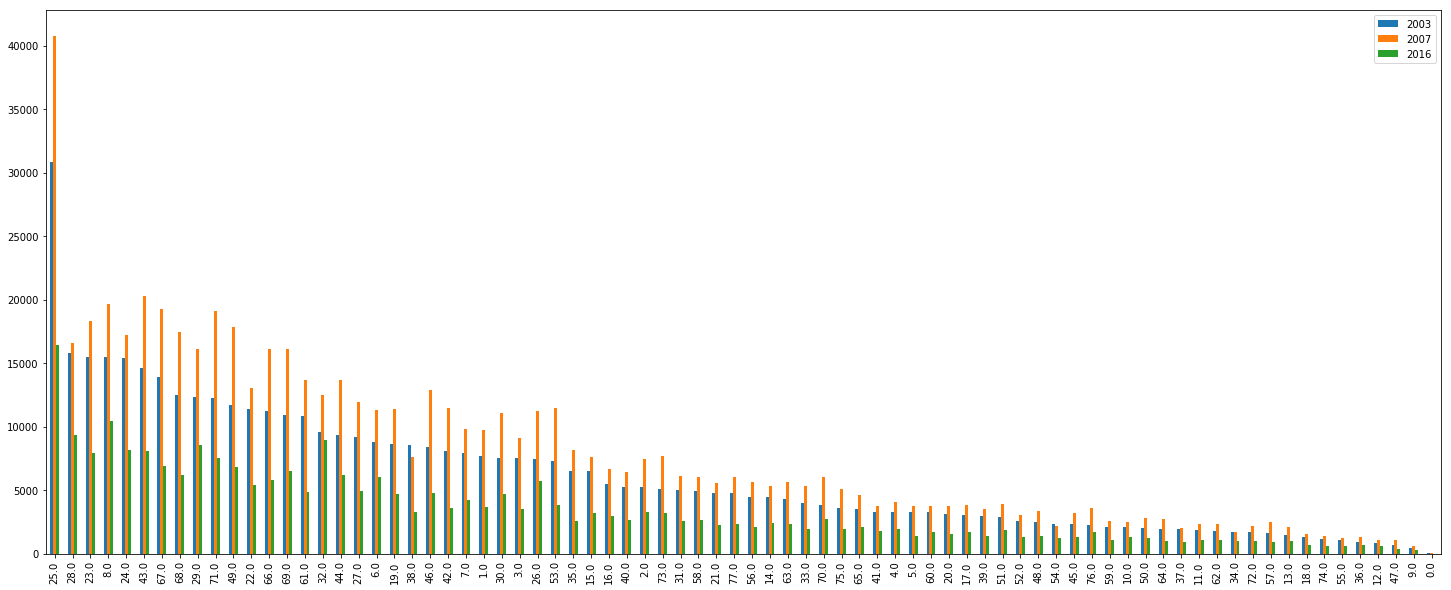

In [17]:
df_areas = pd.DataFrame()
df_areas['2003'] = df_2003['Community Area'].value_counts()
df_areas['2007'] = df_2007['Community Area'].value_counts()
df_areas['2016'] = df_2016['Community Area'].value_counts()
df_areas.plot(kind='bar', rot=90);